In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download kongaevans/speaker-recognition-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# ! unzip speaker-recognition-dataset.zip

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.decomposition import PCA

In [ ]:
a,sr = librosa.load('/content/drive/MyDrive/ML Pro/_background_noise_/doing_the_dishes.wav',sr=None)
sr

22050

In [ ]:


audios = ['/content/drive/MyDrive/ML Pro/Benjamin_Netanyau',
              '/content/drive/MyDrive/ML Pro/Jens_Stoltenberg',
              '/content/drive/MyDrive/ML Pro/Julia_Gillard',
              '/content/drive/MyDrive/ML Pro/Magaret_Tarcher',
              '/content/drive/MyDrive/ML Pro/Nelson_Mandela']
noises = ['/content/drive/MyDrive/ML Pro/_background_noise_',
              '/content/drive/MyDrive/ML Pro/other']

audio_le = LE()
audios_labels = audio_le.fit_transform(audios)
noise_le = LE()
noises_labels = noise_le.fit_transform(noises)



In [ ]:
audio_df = pd.DataFrame({'paths':audios})
sr = 16_000
audio_df['audios'] = audio_df['paths'].apply(lambda x:
    [librosa.load(os.path.join(x,f),sr=sr)[0] for f in os.listdir(x)]
)
noise_df = pd.DataFrame({'paths':noises})
noise_df['audios'] = noise_df['paths'].apply(lambda x:
    [librosa.load(os.path.join(x,f),sr=sr)[0] for f in os.listdir(x)]
)
audio_df['labels'] = audio_le.transform(audio_df['paths'])
noise_df['labels'] = noise_le.transform(noise_df['paths'])

In [ ]:
print("Audio class size",list(audio_df['audios'].apply(len)))
print("Average audio length",list(audio_df['audios'].apply(lambda x: np.mean([len(y)/sr for y in x]))))
print("Noise class size",list(noise_df['audios'].apply(len)))
print("Average noise length",np.mean(noise_df['audios'].apply(lambda x: np.mean([len(y)/sr for y in x]))))

Audio class size [1500, 1500, 1501, 1500, 1500]
Average audio length [1.0, 1.0, 1.0, 1.0, 1.0]
Noise class size [4, 2]
Average noise length 59.61815625


In [ ]:
# for s in range(max(y)+1):
#     #increase figsize
#     plt.figure(figsize=(50,50))
#     plt.subplot(max(y)+1,1,s+1)
#     speakers = X[y==s]
#     spek = speakers[np.random.randint(len(speakers))]
#     stft_X = np.abs(librosa.stft(y=spek,n_fft=512))**2
#     stft_X = np.flip(stft_X,axis=0)
#     plt.imshow(np.log(stft_X) - np.log(stft_X).mean(axis=-1,keepdims=True),cmap='jet')
#     plt.title(audio_le.inverse_transform([s])[0])

In [ ]:
concat_noise = []
for i in range(len(noise_df)):
    concat_noise.extend(np.concatenate(noise_df['audios'].iloc[i]))
concat_noise = np.array(concat_noise)
print("Concatenated noise shape",concat_noise.shape)
chunk_len = sr
chunked_noise = []
for i in range(0,len(concat_noise)-chunk_len,chunk_len):
    chunked_noise.append(concat_noise[i:i+chunk_len])
chunked_noise = np.array(chunked_noise)
print("Noise shape",chunked_noise.shape)



Concatenated noise shape (5691061,)
Noise shape (355, 16000)


In [ ]:
X = []
y = []
for i in range(len(audio_df)):
    for j in range(len(audio_df['audios'].iloc[i])):
        X.append(audio_df['audios'].iloc[i][j])
        y.append(audio_df['labels'].iloc[i])

In [ ]:
# aug_len = len(X)//5
# n = len(X)
# for _ in range(aug_len):
#     i = np.random.randint(n)
#     j = np.random.randint(len(chunked_noise))
#     if np.random.rand() < 0.5:
#         aug_X = X[i] + 0.25*chunked_noise[j]
#     else:
#         aug_X = X[i]*chunked_noise[j]
#     X.append(aug_X)
#     y.append(y[i])

# X = np.array(X)
# y = np.array(y)

In [ ]:
aug_len = len(X)//5
n = len(X)
for _ in range(aug_len):
    i = np.random.randint(n)
    j = np.random.randint(len(chunked_noise))
    check = np.random.rand()
    if check < 0.35:
        aug_X = X[i] + 0.25*chunked_noise[j]
    elif check < 0.6:
        aug_X = X[i]*chunked_noise[j]
    else:
        k = np.random.randint(n)
        aug_X = X[i] + 0.25*X[k]
    X.append(aug_X)
    y.append(y[i])

X = np.array(X)
y = np.array(y)

In [ ]:
print("X (Audio) shape",X.shape)
print("y (label) shape",y.shape)

X (Audio) shape (9001, 16000)
y (label) shape (9001,)


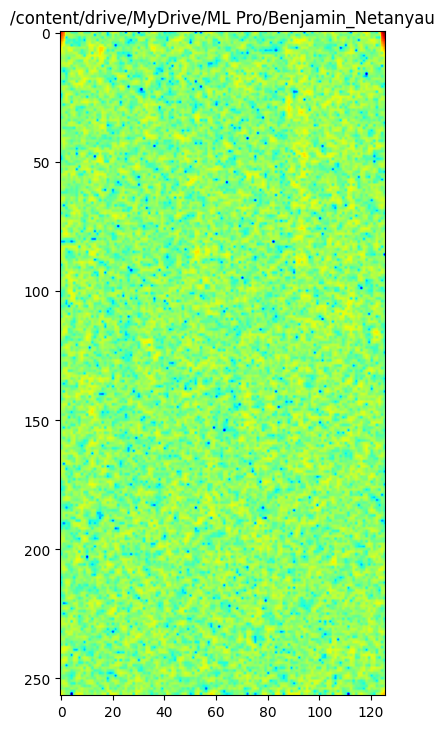

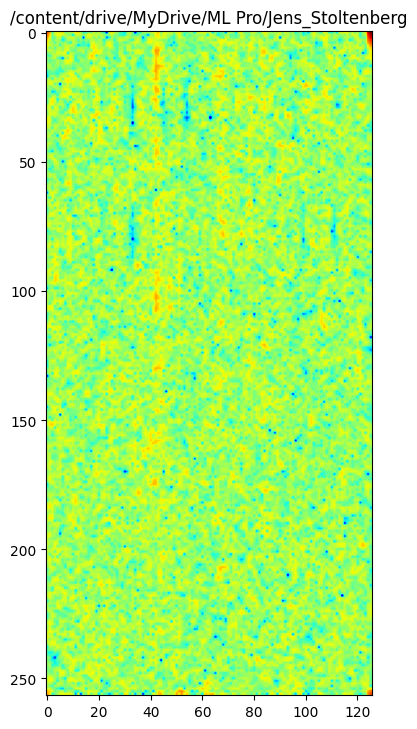

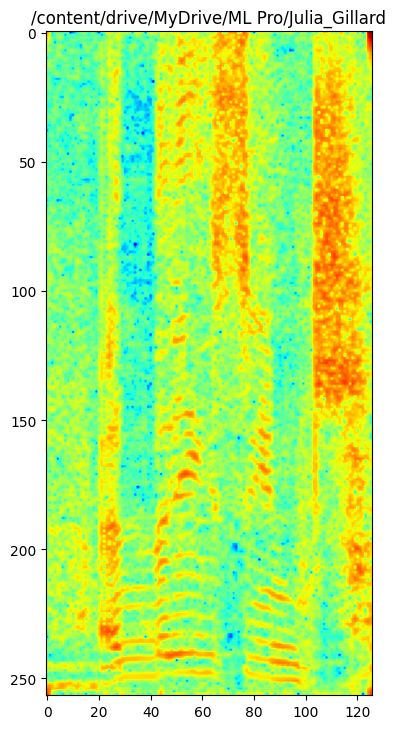

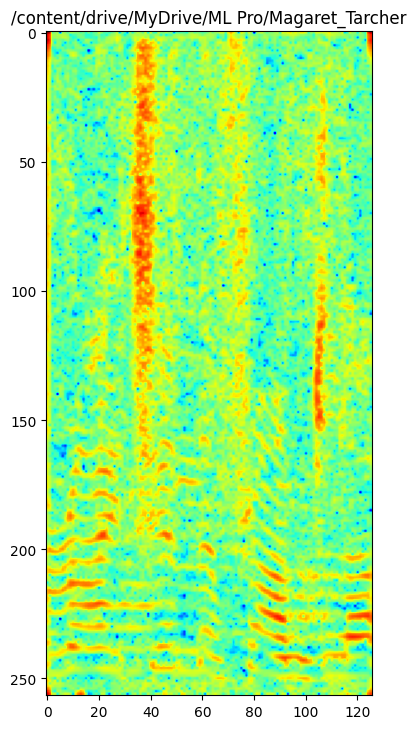

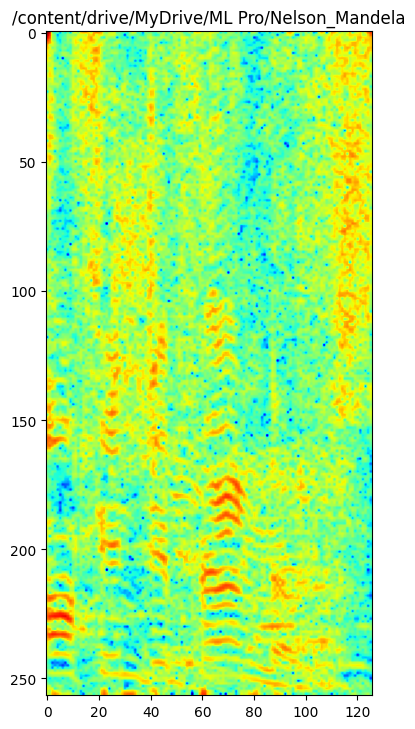

In [ ]:

for s in range(max(y)+1):
    #increase figsize
    plt.figure(figsize=(50,50))
    plt.subplot(max(y)+1,1,s+1)
    speakers = X[y==s]
    spek = speakers[np.random.randint(len(speakers))]
    stft_X = np.abs(librosa.stft(y=spek,n_fft=512))**2
    stft_X = np.flip(stft_X,axis=0)
    plt.imshow(np.log(stft_X) - np.log(stft_X).mean(axis=-1,keepdims=True),cmap='jet')
    plt.title(audio_le.inverse_transform([s])[0])

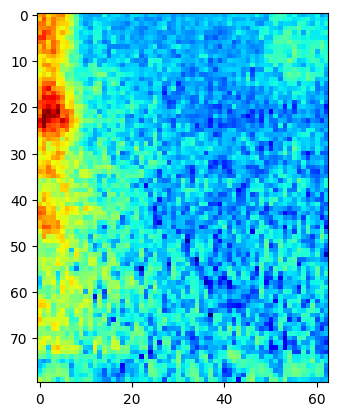

In [ ]:
spec_X = librosa.feature.melspectrogram(y=X[0],sr=sr,n_fft=512,hop_length=256,n_mels=80)
spec_X = np.flip(spec_X,axis=0)
plt.imshow(np.log(spec_X+1e-7)-np.log(spec_X+1e-7).mean(axis=-1,keepdims=True),cmap='jet')
plt.show()

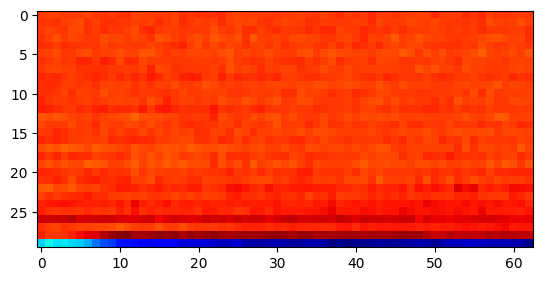

In [ ]:
mfcc_X = librosa.feature.mfcc(y=X[0],sr=sr,n_fft=512,hop_length=256,n_mfcc=30)
mfcc_X = np.flip(mfcc_X,axis=0)
plt.imshow(mfcc_X, cmap='jet')
plt.show()

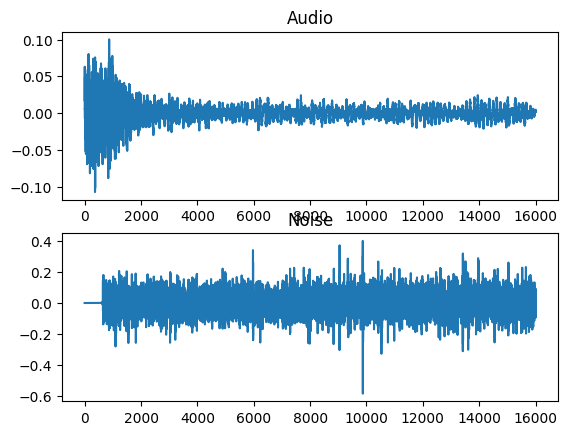

In [ ]:
plt.subplot(2,1,1)
plt.plot(np.arange(sr),X[0])
plt.title("Audio")
plt.subplot(2,1,2)
plt.plot(np.arange(chunk_len),chunked_noise[0])
plt.title("Noise")
plt.show()

In [ ]:
mfccs = librosa.feature.mfcc(y=X,sr=sr,n_fft=400,hop_length=160,n_mfcc=20)
mfccs = mfccs.reshape(mfccs.shape[0],-1)
deltas = librosa.feature.delta(mfccs)
deltas = deltas.reshape(deltas.shape[0],-1)
# lpcs = []
# for i in range(len(X)):
#     lpc_coefficients = librosa.lpc(X[i], order=12)
#     lpcs.append(lpc_coefficients)

# lpcs = np.array(lpcs)
# lpcs = lpcs.reshape(lpcs.shape[0], -1)
# lpcs = []
# for i in range(len(X)):
#   lpcs.append(librosa.lpc(X[i],12))
# lpcs = np.array(lpcs)
# lpcs = lpcs.reshape(lpcs.shape[0],-1)


In [ ]:
# features = librosa.feature.mfcc(y=X,sr=sr,n_fft=512,hop_length=256,n_mfcc=30)
# features = features.reshape((features.shape[0],-1))
# print("Features shape",features.shape)

In [ ]:
# pca = PCA(n_components=250)
# features_pca = pca.fit_transform(features)
# pca.explained_variance_ratio_.sum()

In [ ]:
# # Assuming you have audio data in X and sampling rate sr

# # Compute LPC coefficients
# order = 12  # Example LPC order
# lpc_coeffs = []
# for audio in X:
#     lpc = librosa.lpc(audio, order=order)
#     lpc_coeffs.append(lpc)

# # Convert LPC coefficients to LPCC
# lpcc_coeffs = []
# for lpc in lpc_coeffs:
#     cepstrum = np.fft.fft(lpc)
#     lpcc = np.real(cepstrum)
#     lpcc_coeffs.append(lpcc)

# # Now, lpcc_coeffs contains LPCC features for your audio data


In [ ]:
X = np.concatenate((deltas,mfccs),axis=1)

num_components = 100
from sklearn.decomposition import PCA
pca = PCA(n_components=num_components)
X = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
! pip install LinearSVC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 20.8 MB/s eta 0:00:00


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=0.01,random_state=42,dual=True)
clf.fit(X_train,y_train)
print("Train accuracy",clf.score(X_train,y_train))
print("Test accuracy",clf.score(X_test,y_test))

Train accuracy 0.8001307189542484
Test accuracy 0.8023686158401184


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
from sklearn.metrics import accuracy_score

# Make 1 GMM for all 5 classes
models = []
for i in range(5):
    if len(X_train[y_train==i]) > 0:
        gmm = GMM(n_components=15, covariance_type='diag', random_state=42)
        gmm.fit(X_train[y_train==i])
        models.append(gmm)

y_pred = np.zeros_like(y_test)
for i in range(len(X_test)):
    scores = [m.score(X_test[i].reshape(1,-1)) for m in models]
    y_pred[i] = np.argmax(scores)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9311621021465581


In [ ]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
from sklearn.metrics import accuracy_score
import pickle

# Train GMM model
models = []
for i in range(5):
    if len(X_train[y_train==i]) > 0:
        gmm = GMM(n_components=15, covariance_type='diag', random_state=42)
        gmm.fit(X_train[y_train==i])
        models.append(gmm)

# Evaluate the model
y_pred = np.zeros_like(y_test)
for i in range(len(X_test)):
    scores = [m.score(X_test[i].reshape(1,-1)) for m in models]
    y_pred[i] = np.argmax(scores)

test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = clf.score(X_train, y_train)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

with open('gmm_model.pkl', 'wb') as file:
    pickle.dump(models, file)

with open('linearSVC_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
